# Deliciosas comida asiáticas e indias

## Introducción
La clasificación es una de las actividades fundamentales del investigador de aprendizaje automático y el científico de datos. Desde la clasificación básica de un valor binario ("¿este correo electrónico es o no spam?"), hasta complejas clasificaciones de imágenes y segmentación utilizando la visión por computadora, simpre es útil ser capaz de ordenar los datos en clases y hacerle preguntas.

Para expresar el proceso de una forma más científica, nuestro método de clasificación crea un modelo predictivo que te habilita asignar la relación entre las variables de entrada a las variables de salida.

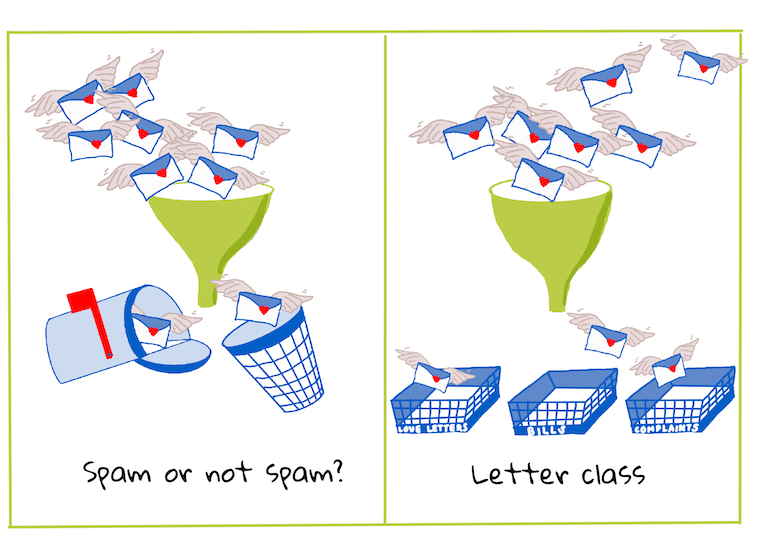

## Hola 'clasificador'
La pregutna que queremos hacer a este conjunto de datos de cocina es realmente una pregunta multiclase, así como tenemos muchas cocinas nacionales potenciales para trabajar, Dado un lote de ingredientes, ¿en cuáles de estas muchas clases encajarán los datos?

Scikit-learn ofrece diversos algoritmos distintos para usar en la clasificación de datos, dependiente en la naturaleza del problema que quieres resolver. En las siguientes dos lecciones, aprenderás acerca de varios de estos algoritmos.

Ejercicio - limpia y equilibra tus datos
La primer tarea a la mano, antes de iniciar este proyecto, es limpiar y equilibrar tus datos para obtener mejores resultados. Comienza con el archivo en blanco notebook.ipynb en la raíz de este directorio.

Lo primero a instalar es [imblearn](https://imbalanced-learn.org/stable/). Este es un paquete de Scikit-learn que te permitirá equilibrar mejor los datos (aprenderás más acerca de esta tarea en un minuto).

1. Para instalar `imblearn`, ejecuta `pip install`, así:

In [1]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


2. Importa los paquetes que necesitas para importar tus datos y visualizarlos, también importa `SMOTE` de `imblearn`.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


Ahora está configurado para leer importart los datos a continuación.

3. La siguiente tarea será importar los datos:

In [2]:
df  = pd.read_csv('../data/cuisines.csv')

Usando read_csv() leerá el contenido del archivo csv cusines.csv y colocarlo en la variable df.

4. Comprueba la forma de los datos:

In [3]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


5. Obtén información acerca de estos datos llamando a info():

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


## Ejercicio - aprendiendo acerca de cocinas
Ahora el trabajo comienza a hacerse más interesante. Descubramos la distribución de los datos, por cocina

1. Grafica los datos como barras llamando barh():

<Axes: ylabel='cuisine'>

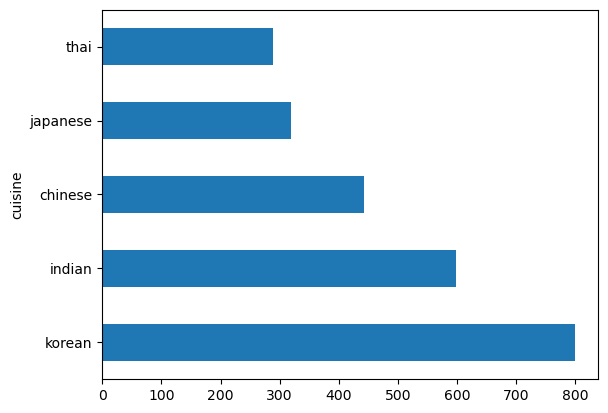

In [5]:
df.cuisine.value_counts().plot.barh()

Existe un número finito de cocinas, pero la distribución de los datos es irregular. ¡Puedes corregirlo! Anter de hacerlo, explora un poco más.

2. Descubre cuántos datos están disponibles por cocina e imprímelos:

In [6]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


## Descubriendo ingredientes
Ahora puedes profundizar en los datos y aprender cuáles son los ingredientes típicos por cocina. Deberías limpiar los datos recurrentes que crean confusión entre cocinas, así que aprendamos acerca de este problema.

1. Crea una función create_ingredient() en Python para crear un dataframe ingrediente. Esta función comenzará eliminando una columna inútil y ordenando los ingredientes por su conteo:

In [7]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

Ahora puedes usar esa función para tener una idea de los 10 ingredientes más populares por cocina.

2. Llama create_ingredient() y graficalo llamando barh():

<Axes: >

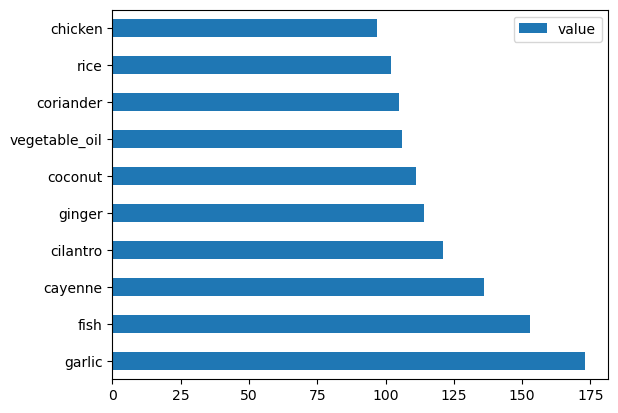

In [8]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

3. Haz lo mismo para los datos de ingredientes japoneses:

<Axes: >

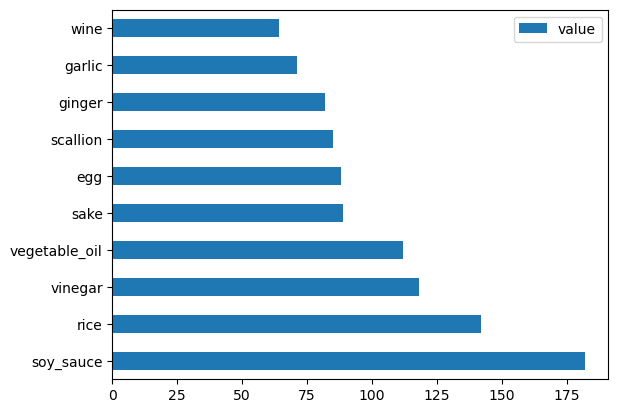

In [9]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

4. Ahora para los ingredientes chinos:

<Axes: >

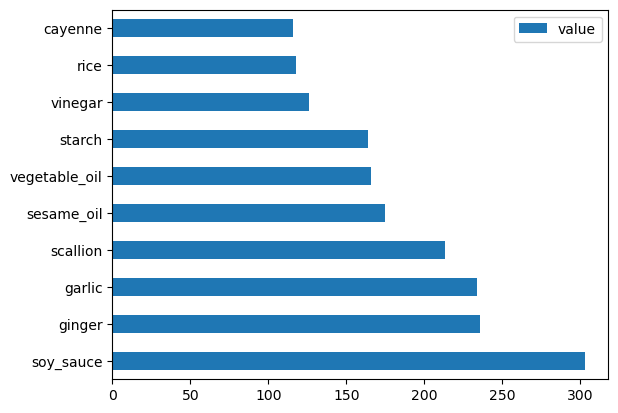

In [10]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

5. Grafica los ingredientes indios:

<Axes: >

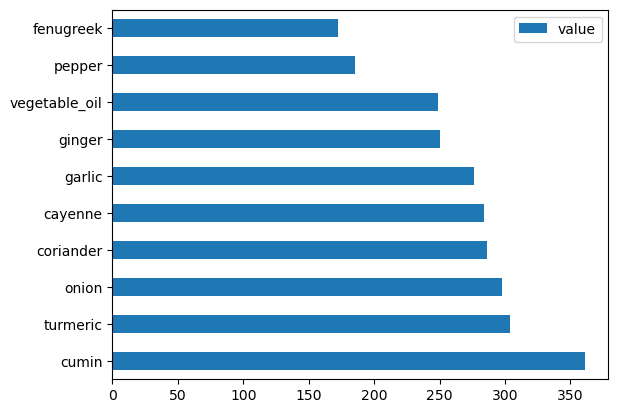

In [11]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

6. Finalmente, grafica los ingredientes coreanos:

<Axes: >

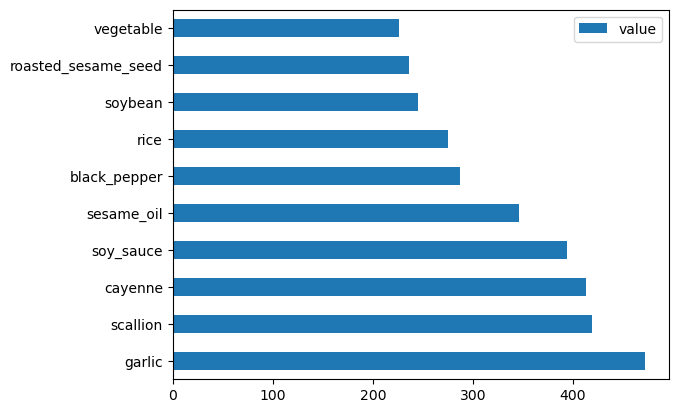

In [12]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

7. Ahora, eliminar los ingredientes más comunes que crean confusión entre las distintas cocinas, llamando drop():

¡Todos aman el arroz, el ajo y el gengibre!

In [13]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Equilibra el conjunto de datos
Ahora que has limpiado los datos, usa SMOTE - "Técnica de sobremuestreo de minoritario sintético" - para equilibrarlo.

1. Llama fit_resample(), esta estrategia genera nuevas muestras por interpolación.

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

Al equilibrar tus datos, tendrás mejores resultados cuando los clasifiques. Piensa en una clasificación binaria. Si la mayoría de tus datos es una clase, un modelo de aprendizaje automático va a predecir esa clase más frecuentemente, solo porque hay más datos para ello. Equilibrar los datos toma cualquier dato sesgado y ayuda a remover este desequilibrio.

2. Ahora puedes comprobar los números de etiquetas por ingredientes:

In [ ]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

Los datos están bien y limpios, equilibrados ¡y muy deliciosos!

El último paso es guardar tus datos equilibrados, incluyendo etiquetas y características, en un nuevo dataframe que pueda ser exportado a un archivo:

In [ ]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

4. Puedes dar un vistazo más a los datos usando transformed_df.head() y transformed_df.info(). Guarda una copia de estos datos para un uso en futuras lecciones:

In [ ]:
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("../data/cleaned_cuisines.csv")